In [206]:
#'''def get_raw_data(index_name,retry_attempts = 3):   
 #   if index_name:
  #      while retry_attempts > 0 :
   #         try:
    #            df = pdr.get_data_yahoo(index_name)
     #           new_df = df.reindex(index=pd.date_range(df.index.min(), 
       #                                   df.index.max(), 
        #                                  freq='D')).fillna(method='ffill')
           #     retry_attempts = 0
          #      return new_df
         #   except:
        #        print("Data pull failed. {} retry attempts remaining".\
       #               format(retry_attempts))
      #          retry_attempts = retry_attempts - 1
  #  else:
 #       print("Invalid usage. Parameter index_name is required")
#    return None'''

In [207]:
#'''sp_df = get_raw_data('GSPC')
#sp_close_series = sp_df.Close()
#plt.style.use('seaborn-poster')
#sp_df.plot(figsize=(15, 7), color = 'teal')
#sp_df.head()
#sp_df'''

# **Import Main Libraries**

In [208]:
import numpy as np  #deal with array
import pandas as pd  # deal with csv files and other tabled files
import matplotlib.pyplot as plt # for show the data
import seaborn as sns #for show the data

# **Load and Analysis Data**

In [209]:
data = pd.read_csv('/content/yahoo_stock.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [210]:
data.shape

(1825, 7)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [212]:
data.duplicated().value_counts()

False    1825
dtype: int64

In [213]:
data.isnull().value_counts()

Date   High   Low    Open   Close  Volume  Adj Close
False  False  False  False  False  False   False        1825
dtype: int64

In [230]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,1825.0,2.660719e+03,4.096809e+02,1.847000e+03,2.348350e+03,2.696250e+03,2.930790e+03,3.645990e+03
Low,1825.0,2.632818e+03,4.043101e+02,1.810100e+03,2.322250e+03,2.667840e+03,2.900710e+03,3.600160e+03
Open,1825.0,2.647705e+03,4.071700e+02,1.833400e+03,2.341980e+03,2.685490e+03,2.913860e+03,3.612090e+03
Close,1825.0,2.647856e+03,4.073012e+02,1.829080e+03,2.328950e+03,2.683340e+03,2.917520e+03,3.626910e+03
Volume,1825.0,3.869627e+09,1.087593e+09,1.296540e+09,3.257950e+09,3.609740e+09,4.142850e+09,9.044690e+09
Adj Close,1825.0,2.647856e+03,4.073012e+02,1.829080e+03,2.328950e+03,2.683340e+03,2.917520e+03,3.626910e+03


In [214]:
#There are six columns given:

#High -> Highest Price of the stock for that particular date.

#Low -> Lowest Price of the stock for that particular date.

#Open -> Opening Price of the stock.

#Close -> Closing Price of the stock.

#Volume -> Total amount of Trading Activity.

#AdjClose -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose
#  Python module that provides classes and functions for the estimation of many different statistical models

In [216]:
data['Date'].mode()

0       2015-11-23
1       2015-11-24
2       2015-11-25
3       2015-11-26
4       2015-11-27
           ...    
1820    2020-11-16
1821    2020-11-17
1822    2020-11-18
1823    2020-11-19
1824    2020-11-20
Length: 1825, dtype: object

In [217]:
data.set_index('Date',inplace= True)

In [260]:
data.index = pd.DatetimeIndex(data.index, freq='D') # Replace the first column to be the index and resorting it 
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [233]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998154,0.999328,0.998958,0.084212,0.998958
Low,0.998154,1.000000,0.998794,0.999020,0.044557,0.999020
Open,0.999328,0.998794,1.000000,0.998344,0.069729,0.998344
Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000
Volume,0.084212,0.044557,0.069729,0.063401,1.000000,0.063401
Adj Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000


# **Data Visualization**

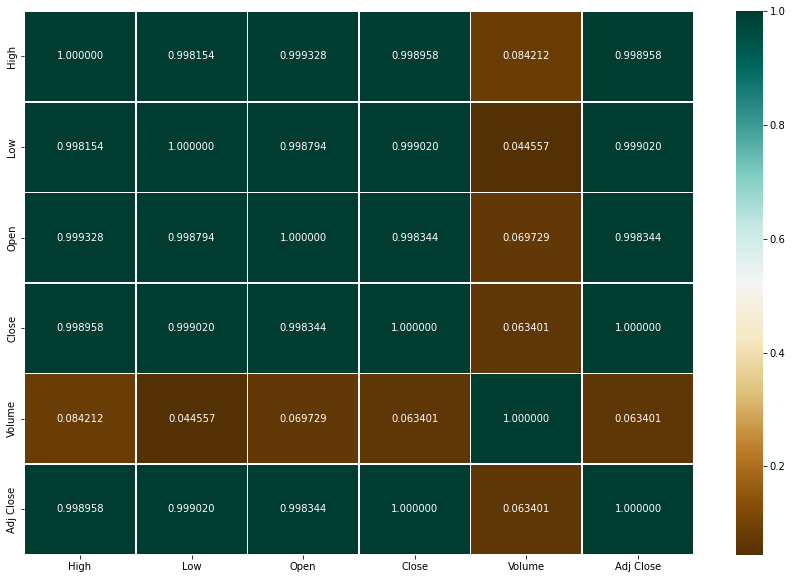

In [295]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidths=0.5,annot=True, fmt="f",cmap='BrBG')

Text(0.5, 1.0, 'Time Series Forecasting for Yahoo')

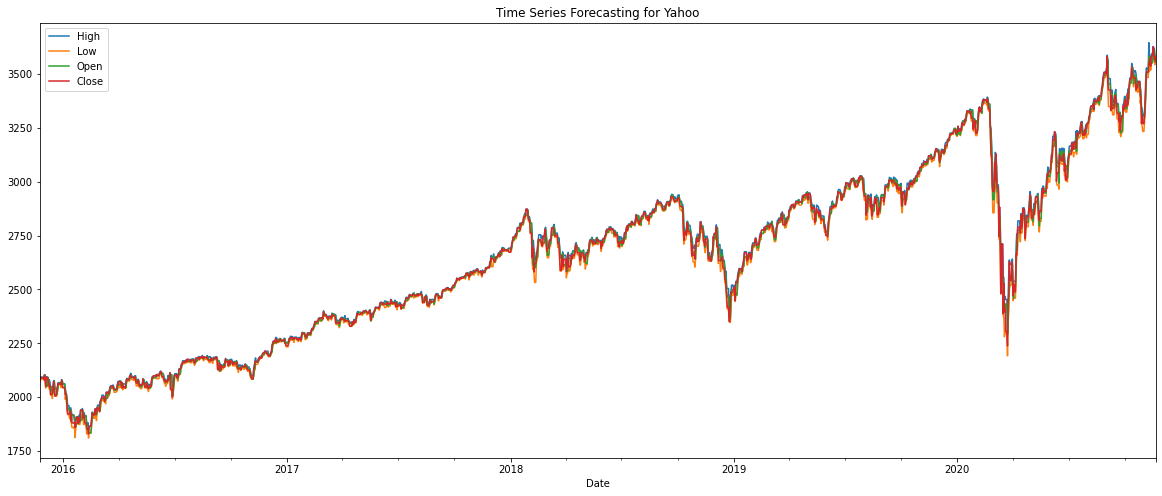

In [299]:
data[['High','Low','Open','Close']].plot(figsize = (20, 8),alpha = 1)
plt.title('Time Series Forecasting for Yahoo')


Text(0.5, 1.0, 'Time Series Stock Forecasting at High and Low Values for Yahoo')

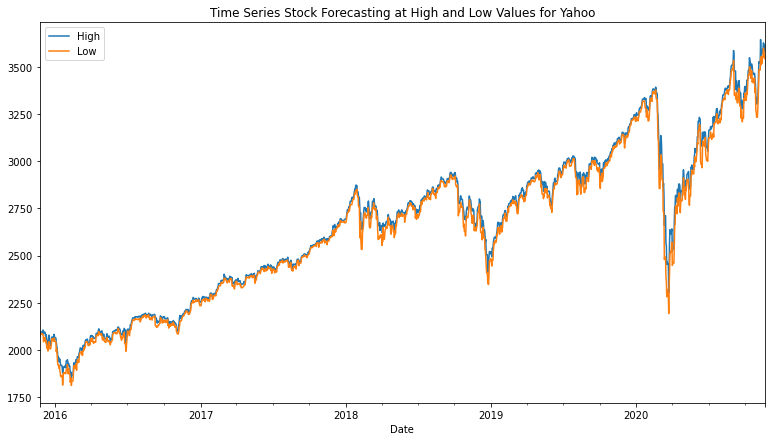

In [298]:
data[['High','Low']].plot(figsize = (13,7))
plt.title('Time Series Stock Forecasting at High and Low Values for Yahoo')


## ***Time Series Forecasting atSome Columns Values of Yahoo***

In [297]:
import plotly.graph_objects as go

print('Time Series Forecasting at High Vaues of Yahoo')
fig = go.Figure([go.Scatter(x=data.index, y=data['High'])])
fig.show()

Time Series Forecasting at High Vaues of Yahoo


In [227]:
fig = go.Figure([go.Scatter(x=data.index, y=data['Low'])])
fig.show()

In [228]:
fig = go.Figure([go.Scatter(x=data.index, y=data['Open'])])
fig.show()

In [229]:
fig = go.Figure([go.Scatter(x=data.index, y=data['Close'])])
fig.show()

In [304]:
fig = go.Figure([go.Scatter(x=data.index, y=data['Volume'])])
fig.show()

In [305]:
fig = go.Figure([go.Scatter(x=data.index, y=data['Adj Close'])])
fig.show()

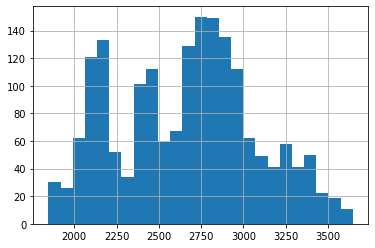

In [232]:
data.High.hist(bins=25)
# Temporoay mode the num.of data values

In [235]:
#data.filter()

In [236]:
data.index.min(), data.index.max()

('2015-11-23', '2020-11-20')

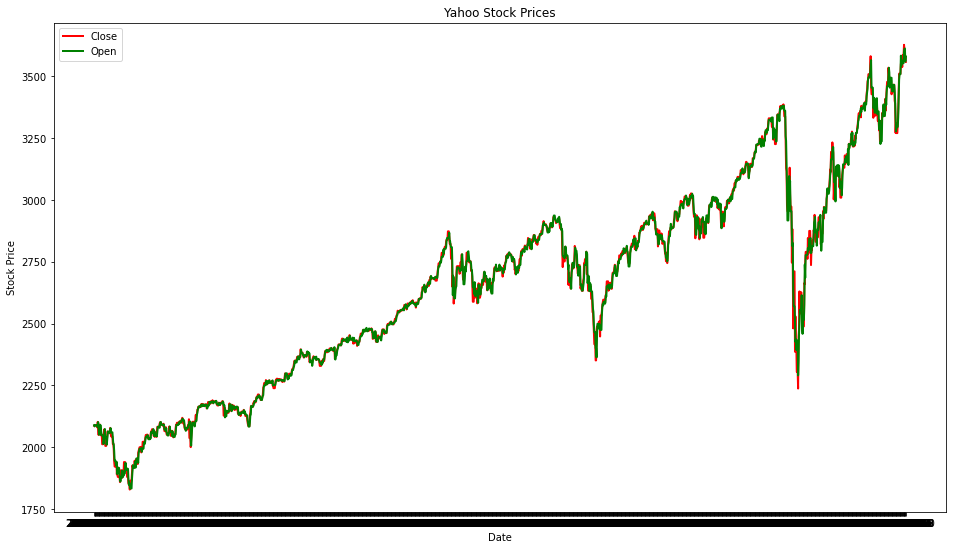

In [237]:
plt.figure(figsize=(16,9))

plt.plot(data.index, data.Close, lw=2, color='r',label='Close')
#plt.plot(data.index, data.High, lw=1, color='g',linestyle='--',alpha=0.7,label='High')
#plt.plot(data.index, data.Low, lw=1, color='m',linestyle='--',alpha=0.7,label='Low')
plt.plot(data.index, data.Open, lw=2, color='g',label='Open')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices')
plt.show()


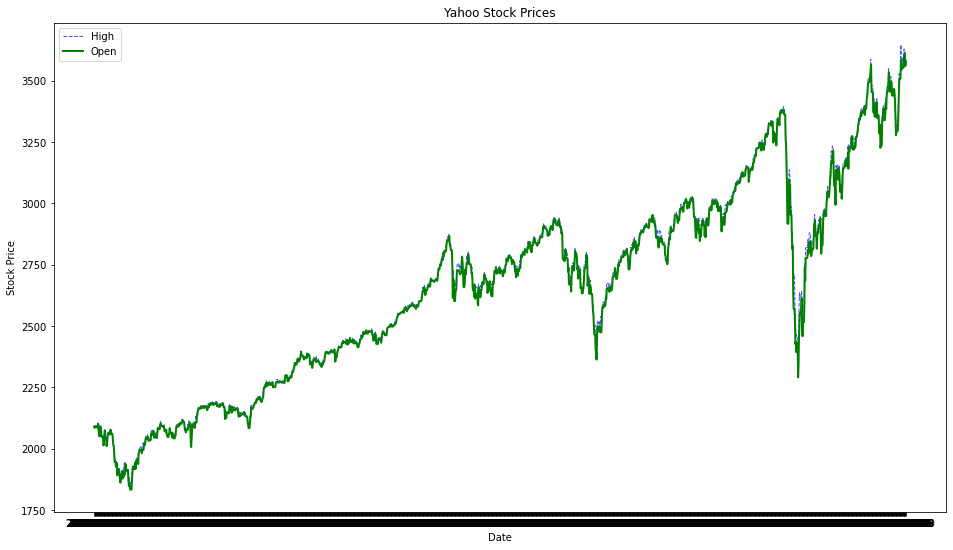

In [238]:
plt.figure(figsize=(16,9))

#plt.plot(data.index, data.Close, lw=2, color='r',label='Close')
plt.plot(data.index, data.High, lw=1, color='b',linestyle='--',alpha=0.7,label='High')
#plt.plot(data.index, data.Low, lw=1, color='m',linestyle='--',alpha=0.7,label='Low')
plt.plot(data.index, data.Open, lw=2, color='g',label='Open')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices')
plt.show()

In [275]:
print('Yahoo Stock Prices Monthly Average')
fig = go.Figure([go.Scatter(x=data.index, y=data['Open'].resample('MS').mean(),name='x')])
fig.show()

Yahoo Stock Prices Monthly Average


In [307]:
print('Yahoo Stock Prices Monthly Stander Deviation')
fig = go.Figure([go.Scatter(x=data.index, y=data['Open'].resample('MS').std())])
fig.show()

Yahoo Stock Prices Monthly Stander Deviation


In [ ]:
# The above fig illustrate behaviourof the stock and thw effect of the black swan.

### ***Illustrate the Seasonal Prices at Yahoo***

<Figure size 1080x720 with 0 Axes>

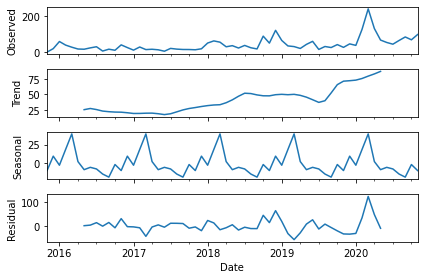

In [286]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,10))
S = seasonal_decompose(data['Open'].resample('MS').std(),model='add')
S.plot()
plt.show()

### Dickey–Fuller test, Test the accuacy of data related to uniroot square value

In [287]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(df_open_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -0.409031
p-value                         0.908580
#Lags Used                      0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                -7.106214e+00
p-value                        4.047416e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64
None


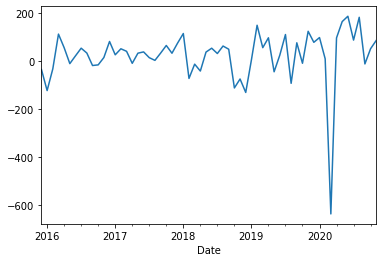

In [288]:
df_open_t_adj = df_open_month_avg - df_open_month_avg.shift(1)
df_open_t_adj = df_open_t_adj.dropna()
df_open_t_adj.plot()

print(adf_test(df_open_t_adj))

# Data Preprocessing 

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to prepare the data to train test and label encode

In [ ]:
# normalize the data or use minmax scalar 

# Deep Learning Model

In [ ]:
# For Model and apply RNN + LSTM
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

In [308]:
# make the model

In [ ]:
# to overcome the overfitting use  heirarical model if the parameters were many 

In [ ]:
# Try to use this lib to see your model layers

#import visualkeras
#visualkeras.layered_view(model)

In [ ]:
# use for 15 --> 30 epoch 

In [ ]:
#use prediction by the test and it will be from 2019

In [ ]:
# plot your prediction

In [ ]:
# Convusion Matrix